<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/2ndWeekTask/Regression_Model_For_Financial_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from patsy import dmatrix
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Assign path dataset
df = pd.read_csv('/content/sample_data/FinancialMarket.csv')

In [47]:
X = df[['x']].values # Feature
y = df['combined_data'].values # Target

# Bagi 2 menjadi training data (80%) dan test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ingat random_state itu seeds kerandomannya

In [48]:
# Vanilla Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediksi
y_pred_linear = linear_model.predict(X_test)

# Define Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)



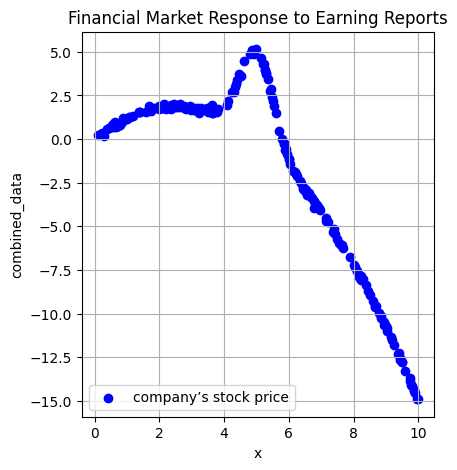

In [49]:
plt.figure(figsize=(10, 5))

# Plot Vanilla Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='company’s stock price')
plt.title(f'Financial Market Response to Earning Reports')
plt.xlabel('x')
plt.ylabel('combined_data')
plt.grid(True)
plt.legend()
plt.show()

In [53]:
# Basis Function Regression / Spline Basis Regression
spline_basis_train = dmatrix("bs(x, df=6, degree=3, include_intercept=False)", {"x": X_train.flatten()}, return_type='dataframe')
spline_basis_test = dmatrix("bs(x, df=6, degree=3, include_intercept=False)", {"x": X_test.flatten()}, return_type='dataframe')

# Spline Regression
spline_model = LinearRegression()
spline_model.fit(spline_basis_train, y_train)

# Define Metrics
y_pred_spline = spline_model.predict(spline_basis_test)
mse_spline = mean_squared_error(y_test, y_pred_spline)
rmse_spline = np.sqrt(mse_spline)
r2_spline = r2_score(y_test, y_pred_spline)

# Smoothing
X_full = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
spline_basis_full = dmatrix("bs(x, df=6, degree=3, include_intercept=False)", {"x": X_full.flatten()}, return_type='dataframe')
y_spline_full = spline_model.predict(spline_basis_full)



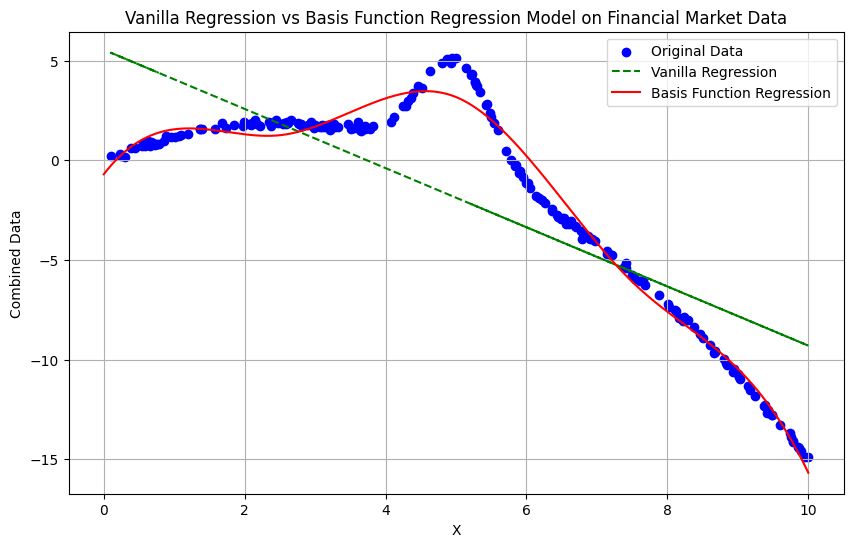

In [54]:
plt.figure(figsize=(10, 6))

# Original test data
plt.scatter(X_test, y_test, color='blue', label='Original Data')

# Vanilla Linear Regression
plt.plot(X_test, y_pred_linear, color='green', linestyle='--', label='Vanilla Regression')

# Spline Regression
plt.plot(X_full, y_spline_full, color='red', label='Basis Function Regression')

# Plot settings
plt.title('Vanilla Regression vs Basis Function Regression Model on Financial Market Data')
plt.xlabel('X')
plt.ylabel('Combined Data')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Printing the performance metrics
print("Vanilla Regression Metrics:")
print(f"MSE: {mse_linear:.4f}, RMSE: {rmse_linear:.4f}, R²: {r2_linear:.4f}")

print("\nSpline Regression Metrics:")
print(f"MSE: {mse_spline:.4f}, RMSE: {rmse_spline:.4f}, R²: {r2_spline:.4f}")

Vanilla Regression Metrics:
MSE: 9.4014, RMSE: 3.0662, R²: 0.6782

Spline Regression Metrics:
MSE: 0.5789, RMSE: 0.7609, R²: 0.9802


MSE adalah rata-rata perbedaan kuadrat antara nilai prediksi dan nilai aktual. Ini mengukur seberapa jauh prediksi menyimpang dari data aktual.

RMSE adalah akar kuadrat dari MSE, memberikan metrik kesalahan dalam unit yang sama dengan variabel target. Hal ini membuatnya lebih mudah untuk diinterpretasikan.

R² adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen dalam model. Nilainya berkisar antara 0 hingga 1 (persentase %).